# 最优化算法与编程基础

最优化算法的内容包括：规划论（线性规划、非线性规划、整数规划和动态规划）、库存论、图论、排队论、可靠性理论、对策论、搜索论等。

# 数学规划方法

## 线性规划

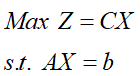

### 单纯形法

单纯形法是求解线性规划的经典方法，其原理类似多远消去法求解多元一次方程的原理类似，在具体的实现上，是通过矩阵的变换对解空间进行搜索。由于目标函数和约束都是凸函数，所以单纯形法能够以很高的效率求解线性规划问题。单纯形法是运筹优化算法的基础算法，也是后续其他整数规划等算法的基础。

单纯形法是解决线性规划问题的一个有效的算法。由于线性规划模型中目标函数和约束方程都是凸函数，因此从凸优化的角度来说，线性规划的最优解在可行域的顶点上，单纯形法的本质就是通过矩阵的线性变换来遍历这些顶点来计算最优解。

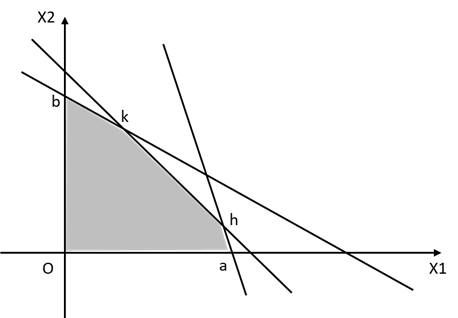

### 内点法

内点法也是求解线性规划的一个方法，相比单纯形法，内点法在大规模线性优化、二次优化、非线性规划方面都有比较好的表现，内点法是多项式算法，随着问题规模增大计算复杂度不会急剧增大，因此在大规模问题上比单纯形法有更广泛的应用。

内点法的求解思路和拉格朗日松弛法的思路类似，将约束问题转化为无约束问题，通过无约束函数的梯度下降进行迭代直至得到有效解。所谓内点法，就是梯度下降的过程中，如果当前迭代点是在可行域外，则给损失函数一个非常大的值，这样就能约束在可行域内求解。但是内点法不能处理等式约束，因为构造的内点惩罚函数是定义在可行域内的函数，而等式约束优化问题不存在可行域空间。由此看来，内点法和单纯形法对优化问题的形式是不一样的。

### 列生成法

列生成法是一种用于求解大规模线性优化问题的非常高效的算法，本质上而言，列生成算法就是单纯形法的一种形式，是用来求解线性规划问题的，所不同的是列生产法改善了大规模优化问题中，单纯形法基变换计算效率低的问题，列生产法在整数规划中已经得到广泛应用。

列生成法主要用于解决变量很多而约束相对较少的问题，特别地经常用于解决大规模整数规划问题中，整数规划问题我们后面会讲。单纯型法虽然能保证在数次迭代后找到最优解，但是其面对变量很多的线性规划问题就显得很弱了。因为它需要去在众多变量里进行基变换，这种遍历的计算量是很大的。因此，有人基于单纯型法提出了列生成算法，其思路大概就是先把原问题(master problem)强制把一部分变量限定（restrict）为非基变量得到到一个规模更小（即变量数比原问题少的）的限制主问题（restricted master problem），在限制主问题（restricted master problem）上用单纯型法求最优解，但是此时求得的最优解只是限制主问题的解，并不是原问题的最优解，就需要通过一个子问题（subproblem）去检查在那些未被考虑的变量中是否有使得限制主问题的ReducedCost小于零，如果有，那么就把这个变量的相关系数列加入到限制主问题的的系数矩阵中。

### 拉格朗日法

对于约束优化问题，可以通过内点法转化成无约束优化问题，除了内点法外，还有一种方法应用较广，就是拉格朗日乘子法。拉格朗日乘子法通过引入拉格朗日乘子将等式约束转成无约束优化问题，对于不等式约束，通过KKT对偶条件将转化成等式约束后在使用拉格朗日乘子法求解。拉格朗日求得的并不一定是最优解，只有在凸优化的情况下，才能保证得到的是最优解。

## 整数规划

在许多的实际问题中，要求决策变量的取值为正整数，比如机器的台数，需求商品的数量，工人的数量，装载货物的汽车数量等，这类要求变量为整数的问题称为整数规划（Integer Programming,IP）问题，如果只要求一部分决策变量取整数，则称为混合整数规划（Mix Integer Programming,MIP）,如果决策变量的取值只能是0或1，则称为0-1整数规划（Binary Integer Programming,BIP）,如果模型是线性模型，则称之为整数线性规划（Integer Linear Programming,ILP）。

### 分支定界法

分支定界法（Branch and Bound Algorithm, B&B），其基本思想是，对有整数约束条件的问题的可行域进行系统搜索，通常是把全部解空间反复地切割为越来越小的子集，称为分支，然后在每个子集内计算出一个目标下界，称为定界。在每次分支后，凡是下界比已知可行域目标值的那些子集差就不再进一步分支，从而减少搜索空间，称为剪枝，这边是分支定界法的主要思路。

分支定界法的思路是对原问题对应的松弛问题的可行域进行切割，切割方法是对非整数变量取相邻整数作为附加约束，从几何的角度来说，这些约束相当于切割可行域的超平面，这些超平面与坐标轴平行，分支定界法的缺点是子问题由于分支的增加呈指数增长。

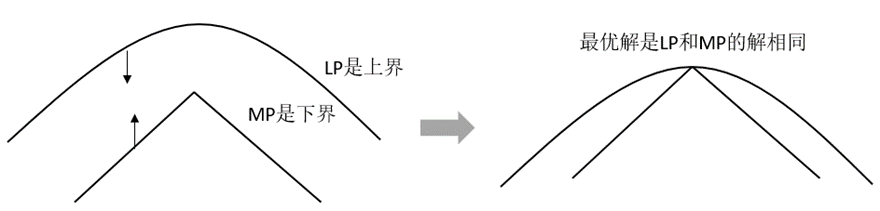

### 割平面法

割平面法通过增加切割超平面切割掉部分的解空间，该超平面应该满足两个条件：（1）刚好切割掉松弛问题的非整数解部分，（2）保留所有的整数解。

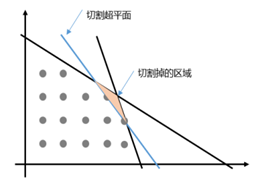

## 多目标优化

多目标优化（Multi-Objective Optimization Problem, MOP）也叫多目标规划，即同时优化多个目标的规划问题。

多目标规划一般有两种方法，一种是化多为少，即将多目标转化为比较容易求解的单目标规划方法，另一种是分层序列法，即把目标按其重要性排序，每次都在前一个目标最优解集内求解下一个目标最优解，直到求出共同的最优解。如何理解目标最优解集呢，在多目标规划中往往有多个最优解同时满足约束条件，不同的解之间不能简单通过大小来比较，这点和单目标规划是最大的不同，多个解组成的集合称为帕累托最优解集，组成的超平面称为帕累托前沿。

在多目标规划中，Pareto解是这样一个解，对其中一个目标的优化必然会导致其他目标变差，即一个解可能在其中某个目标上是最好的，但是在其他目标上是最差的，不一定在所有目标上都是最优解。在所有目标函数都是极小化的多目标规划问题中，对于任意的$k$，有$f_k(X^*)<=f_k(X)$，$X^*$支配其他解$X$，称$X^*$是多目标规划的一个Pareto最优解，又称非劣最优解。所有的Pareto最优解组成Pareto最优集合。所有Pareto最优解组成的曲面称为Pareto前沿（Pareto Front）。

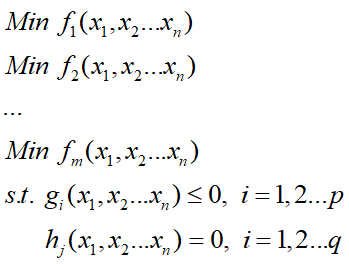

### 目标规划法

目标规划法也称功效系数法，是目前流行的求解多目标规划方法，这里将重点讲解该方法。目标规划的基本思想是，给定若干个目标以及实现这些目标的优先顺序，在资源有限的情况下，使总的偏离目标的偏差值最小。优先顺序很好理解，实现起来的方法通过给目标赋予一个权重即可。偏差变量表示未达到目标或者超过目标的部分，通常用正偏差表示目标值的部分，用负偏差表示未达到目标值的部分。

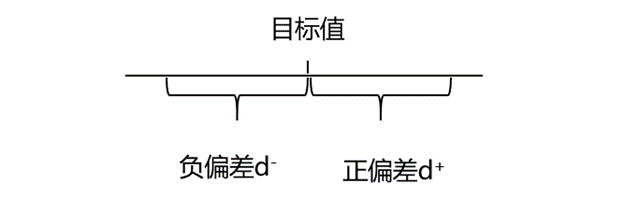

### 目标规划单纯形法

目标规划的数学模型结构和线性规划的数学模型结构没有本质的区别，因此目标规划也可以用单纯形法求解。但是由于目标规划中含有多个目标函数，因此单纯形表中的检验数会有多行，检验数的行数由目标优先等级的个数决定，在确认入基变量时，不但要根据本优先级的检验数，还要根据比它更高优先级的检验数来确定。

### NSGA-Ⅱ

多目标规划算法除了前面提到的目标规划法外，使用智能优化算法求解多目标规划问题也是常见的方法，其中以NSGA-Ⅱ最为流行。

NSGA-Ⅱ算法是Srinivas和Deb于2000年在 NSGA 的基础上提出的，它比 NSGA算法更加优越，它采用了快速非支配排序算法，计算复杂度比NSGA大大的降低；采用了拥挤度和拥挤度比较算子，代替了需要指定的共享半径 shareQ，并在快速排序后的同级比较中作为胜出标准，使准 Pareto 域中的个体能扩展到整个 Pareto 域，并均匀分布，保持了种群的多样性；引入了精英策略，扩大了采样空间，防止最佳个体的丢失，提高了算法的运算速度和鲁棒性。

# 启发式算法

## 动态规划

动态规划（dynamic programming，DP）是运筹学的一个分支，是解决多阶段决策过程最优化的一种方法，它把多变量复杂决策的问题进行分阶段决策，高效求解多个单变量的决策问题，许多问题用动态规划处理，比用线性规划或非线性规划处理更加有效，比如最短路径问题，设备维修换新问题，多阶段库存问题等，动态规划在现代企业管理，工农业生产中有着广泛的应用。

什么是多阶段决策问题呢？有这样一类问题，它可以从时间或者空间上将决策的过程分解为若干个相互联系的阶段，每个阶段都需要做出决策，当前阶段的决策往往会影响到下一个阶段的决策。我们把各阶段的决策构成一个决策序列，称为策略。因为每个阶段都有若干个决策可供选择，因为就有许多策略供我们选择。如何在这些策略中选择一个最优策略，这类问题就是多阶段决策问题。

动态规划的最优性原理是：作为整体过程的最优策略，无论过去的状态和决策如何，对前面的形成状态而言，剩下的决策必然构成最优策略，简而言之，一个最优策略的子策略总是最优的。

最优性原理是动态规划的核心，各种动态规划模型都是根据这一原理进行，根据这一原理，在求解动态规划问题时，可以按照从后往前倒推最优解的思路进行。

### 最短路径问题

最短路径是一类典型的动态规划问题。

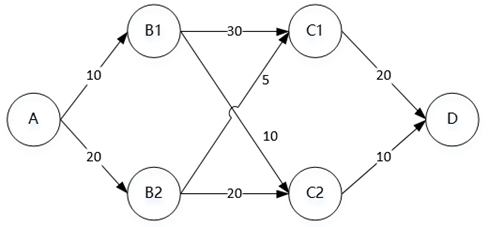

### 背包问题

背包问题是学习动态规划的经典例题，虽然是多阶段决策问题，但不同于最短路径问题那样直观，最短路径问题的不同阶段、状态、决策、收益是固定而明显的，而背包问题的状态、决策需要通过动态规划表来表达。

背包问题根据物品的数量分为不同类型背包问题，如果每种物品只有一件，成为0-1背包问题，可以看成是0-1整数规划问题；如果每种物品有多件，则背包问题可以看成是普通的整数规划问题；对于每件物品，具有两种不同的费用，选择这件物品必须同时付出这两种代价，对于每种代价都有一个可付出的最大值，这种情况是二维费用的背包问题；如果物品之间有冲突，选择A物品则不能选B物品，这种情况是分组背包问题，如果物品之间有依赖，选择A物品则必须同时选B物品，这种情况是有依赖的背包问题。

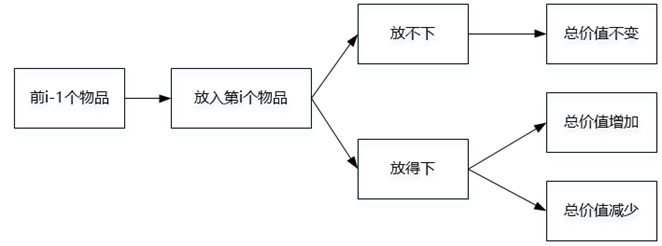

## 图与网络分析

### 图的基本概念

在运筹优化领域，图与网络分析是一个很重要的组成部分，特别是在交通运输领域，问题会被建模成一个图优化问题。不仅仅是交通问题可以用图的模型表示，像人物关系图谱、任务流程依赖关系、电力线网、信息网络等都可以用图来表示。

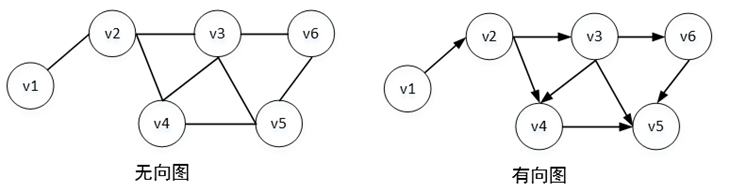

### 图的矩阵表示

图的存储和表示，一个常见的方式是邻接矩阵，邻接矩阵是一个二维矩阵，矩阵的行和列表示顶点编号，值表示顶点之间的边信息。设图G有n个顶点，则邻接矩阵是NxN一个的方阵，定义为：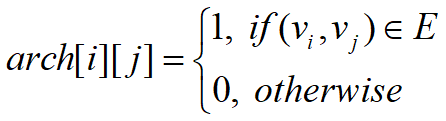

### 最小生成树

在图网络中，一个无圈且连通的无向图称为树。注意，树首先是无圈的，其次是连通的。如图，左图是一连通图，右图是左图的一棵树。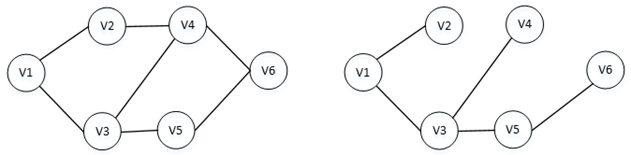

权值总和是衡量切割优劣的一个指标，在大部分问题中，我们希望图经过切割后生成的树，边的权值总和最小，这样的树称为图的最小生成树。 

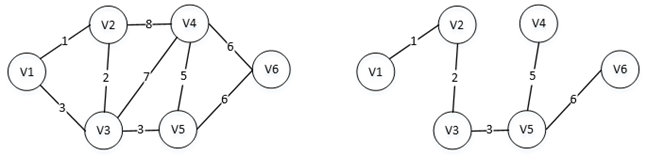

### 最短路径问题

用图网络理论来分析最短路径问题的原理：若$\{v_1, v_2, ...,v_n\}$是$v_1$到$v_n$的最短路径，则$\{v_1, v_2, ...,v_i\}$也必然是$v_1$到$v_i$的最短路径。动态规划中，最短路径是反向搜索问题，而图分析属于正向搜索问题。最常用的方法是迪克斯科拉(Dijkstra)算法。

### 网络最大流问题

研究网络通过的流量也是生产管理中经常遇到的问题，比如交通干线车辆最大通行能力，生产流水线产品最大加工能力，供水网络中最大水流量等。这类网络的弧有确定的容量（capacity）,常用$c_{ij}$表示i从节点到节点j的弧最大流量，实际上通过该弧的流量不一定能达到最大流量，常用$f_{ij}$表示通过弧的实际流量。

### 路径规划

路径规划描述的问题和最短路径问题类似，前面讲的最短路径问题是一维网络最短路径问题，网络使用节点和边来表达，而路径规划问题是二维坐标系中的最短路径问题，节点使用二维坐标表示，比如地图、棋盘的场景的路径规划，在地图或者棋盘中，每个坐标点表示一个节点，这样任意两个节点之间的路径搜索比之前讲最短路径问题要多很多，在前面dijkstra讲算法时我们知道，dijkstra使用深度优先搜索或者广度优先搜寻对整个网络进行搜索，显然这种方法在二维坐标的中是耗费会跟多，这就需要使用新的方法来解决路径规划问题。

### VRP问题

VRP是车辆路径问题，是TSP问题的扩展，是交通物流领域的研究热点。

# 智能优化算法

## 粒子群算法

粒子群算法（Particle Swarm Optimization，PSO），模拟鸟群捕食过程的算法，它的基本核心是利用群体中的个体对信息的共享从而使得整个群体的运动在问题求解空间中产生从无序到有序的演化过程，从而获得问题的最优解。我们可以利用一个有关PSO的经典描述来对PSO算法进行一个直观的描述。设想这么一个场景：一群鸟进行觅食，而远处有一片玉米地，所有的鸟都不知道玉米地到底在哪里，但是它们知道自己当前的位置距离玉米地有多远。那么找到玉米地的最佳策略，也是最简单有效的策略就是搜寻目前距离玉米地最近的鸟群的周围区域。PSO就是从这种群体觅食的行为中得到了启示，从而构建的一种优化模型。 